In [1]:
#https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from __future__ import division, print_function
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from keras.applications import vgg16
from keras.layers import Input, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten, Lambda
from keras.models import Sequential, Model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise
from random import shuffle
from scipy.misc import imresize
import itertools
from keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
from keras import optimizers
import os
from PIL import Image
from numpy import dot
from numpy.linalg import norm
import glob    
import pandas as pd
%matplotlib inline
import pickle
import cv2

Using TensorFlow backend.


In [3]:
seenTr=pd.read_csv('dataset_seen_training_siamese.csv')
seenVal=pd.read_csv('dataset_seen_validation_siamese.csv')
data_seen_dir = ("D:/ML/seen-dataset/")
images_seen_traning_dir = os.path.join(data_seen_dir, "TrainingSet/")
print(images_seen_traning_dir)
images_seen_validation_dir = os.path.join(data_seen_dir, "ValidationSet/")
print(images_seen_validation_dir)

D:/ML/seen-dataset/TrainingSet/
D:/ML/seen-dataset/ValidationSet/


In [4]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
def datagen(path):
    image_list = []
    file=[]
    for filename in glob.glob(path+'/*.png'): #assuming gif
        im=cv2.imread(filename,0)
        image_list.append(im)
        x = filename.split('\\')        
        file.append(x[-1])
    return image_list,file

In [9]:
training_image, training_img_name = datagen(images_seen_traning_dir)
training_image = np.asarray(training_image)
x_train = training_image
validation_image, validation_img_name = datagen(images_seen_validation_dir)
validation_image = np.asarray(validation_image)
x_test = validation_image

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
pval=0.96
print (x_train.shape)
print (x_test.shape)

In [11]:
history=autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 12846 samples, validate on 952 samples
Epoch 1/500
12846/12846 [==============================] - 3s 215us/step - loss: 0.3138 - val_loss: 0.1729
Epoch 2/500
12846/12846 [==============================] - 2s 194us/step - loss: 0.1745 - val_loss: 0.1716
Epoch 3/500
12846/12846 [==============================] - 2s 187us/step - loss: 0.1739 - val_loss: 0.1718
Epoch 4/500
12846/12846 [==============================] - 2s 186us/step - loss: 0.1737 - val_loss: 0.1711
Epoch 5/500
12846/12846 [==============================] - 2s 188us/step - loss: 0.1736 - val_loss: 0.1721
Epoch 6/500
12846/12846 [==============================] - 2s 189us/step - loss: 0.1735 - val_loss: 0.1711
Epoch 7/500
12846/12846 [==============================] - 3s 197us/step - loss: 0.1735 - val_loss: 0.1712
Epoch 8/500
12846/12846 [==============================] - 3s 201us/step - loss: 0.1734 - val_loss: 0.1710
Epoch 9/500
12846/12846 [=======================

Epoch 74/500
12846/12846 [==============================] - 3s 209us/step - loss: 0.1548 - val_loss: 0.1519
Epoch 75/500
12846/12846 [==============================] - 3s 209us/step - loss: 0.1546 - val_loss: 0.1516
Epoch 76/500
12846/12846 [==============================] - 3s 216us/step - loss: 0.1544 - val_loss: 0.1514
Epoch 77/500
12846/12846 [==============================] - 3s 219us/step - loss: 0.1541 - val_loss: 0.1512
Epoch 78/500
12846/12846 [==============================] - 3s 207us/step - loss: 0.1539 - val_loss: 0.1511
Epoch 79/500
12846/12846 [==============================] - 3s 209us/step - loss: 0.1537 - val_loss: 0.1508
Epoch 80/500
12846/12846 [==============================] - 3s 204us/step - loss: 0.1535 - val_loss: 0.1505
Epoch 81/500
12846/12846 [==============================] - 3s 202us/step - loss: 0.1533 - val_loss: 0.1502
Epoch 82/500
12846/12846 [==============================] - 3s 217us/step - loss: 0.1531 - val_loss: 0.1500
Epoch 83/500
12846/12846 [==

12846/12846 [==============================] - 3s 222us/step - loss: 0.1331 - val_loss: 0.1306
Epoch 225/500
12846/12846 [==============================] - 3s 205us/step - loss: 0.1330 - val_loss: 0.1305
Epoch 226/500
12846/12846 [==============================] - 3s 204us/step - loss: 0.1329 - val_loss: 0.1304
Epoch 227/500
12846/12846 [==============================] - 3s 207us/step - loss: 0.1328 - val_loss: 0.1303
Epoch 228/500
12846/12846 [==============================] - 3s 203us/step - loss: 0.1327 - val_loss: 0.1301
Epoch 229/500
12846/12846 [==============================] - 4s 281us/step - loss: 0.1326 - val_loss: 0.1301
Epoch 230/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1325 - val_loss: 0.1300
Epoch 231/500
12846/12846 [==============================] - 4s 346us/step - loss: 0.1324 - val_loss: 0.1299
Epoch 232/500
12846/12846 [==============================] - 4s 346us/step - loss: 0.1323 - val_loss: 0.1297
Epoch 233/500
12846/12846 [======

12846/12846 [==============================] - 4s 343us/step - loss: 0.1215 - val_loss: 0.1194
Epoch 375/500
12846/12846 [==============================] - 4s 338us/step - loss: 0.1214 - val_loss: 0.1193
Epoch 376/500
12846/12846 [==============================] - 4s 336us/step - loss: 0.1214 - val_loss: 0.1193
Epoch 377/500
12846/12846 [==============================] - 4s 333us/step - loss: 0.1213 - val_loss: 0.1193
Epoch 378/500
12846/12846 [==============================] - 4s 336us/step - loss: 0.1213 - val_loss: 0.1192
Epoch 379/500
12846/12846 [==============================] - 4s 337us/step - loss: 0.1212 - val_loss: 0.1191
Epoch 380/500
12846/12846 [==============================] - 4s 333us/step - loss: 0.1212 - val_loss: 0.1190
Epoch 381/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1211 - val_loss: 0.1190
Epoch 382/500
12846/12846 [==============================] - 4s 328us/step - loss: 0.1211 - val_loss: 0.1190
Epoch 383/500
12846/12846 [======

12846/12846 [==============================] - 4s 340us/step - loss: 0.1179 - val_loss: 0.1160
Epoch 450/500
12846/12846 [==============================] - 4s 341us/step - loss: 0.1178 - val_loss: 0.1160
Epoch 451/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1178 - val_loss: 0.1159
Epoch 452/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1178 - val_loss: 0.1159
Epoch 453/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1177 - val_loss: 0.1158
Epoch 454/500
12846/12846 [==============================] - 4s 333us/step - loss: 0.1177 - val_loss: 0.1158
Epoch 455/500
12846/12846 [==============================] - 4s 340us/step - loss: 0.1176 - val_loss: 0.1158
Epoch 456/500
12846/12846 [==============================] - 4s 336us/step - loss: 0.1176 - val_loss: 0.1157
Epoch 457/500
12846/12846 [==============================] - 4s 349us/step - loss: 0.1176 - val_loss: 0.1157
Epoch 458/500
12846/12846 [======

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8C4993C88>,
      dtype=object)

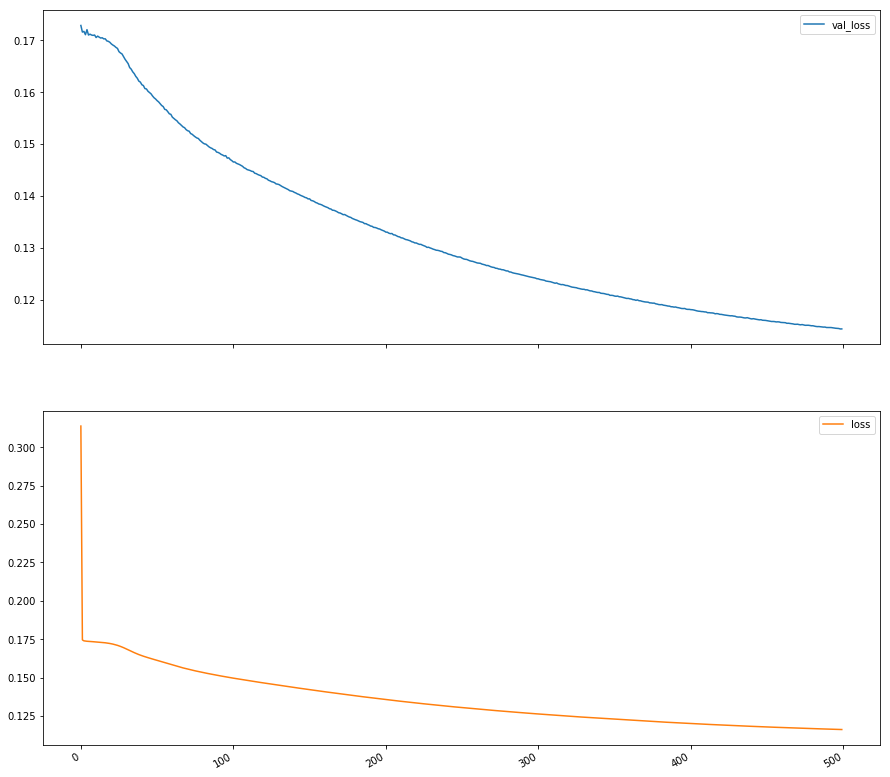

In [13]:
df_hist = pd.DataFrame(history.history)
df_hist.plot(subplots=True, figsize=(15,15))

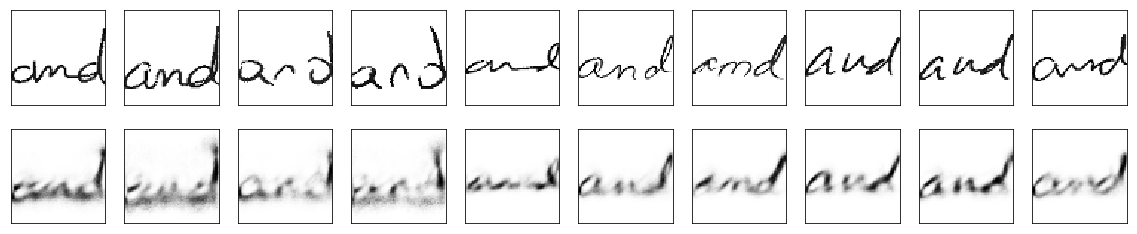

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return (dot_product / (norm_a * norm_b))

In [16]:
#print(training_img_name)
df = pd.read_csv('dataset_seen_validation_siamese.csv')
orgLabels=df.iloc[:,3:4].values.tolist()
target=[]
for i in range(0,len(orgLabels)):
    target.append(orgLabels[i][0])
#print(target)
left_name = df.iloc[:,1:2].values.tolist()
right_name = df.iloc[:,2:3].values.tolist()
final = list(zip(left_name, right_name))
predict=[]
target_final = []

labelsNew=[]
for i in range(0,len(final)):
    i1,i2 = final[i]
    #print(type(i1))
    #print(i1,i2)
    x=''.join(i1)
    y=''.join(i2)
    if(x[:4]==y[:4]):
        target_final.append(1)
    else:
        target_final.append(0)
    #if((''.join(i1)) in training_img_name and (''.join(i2)) in training_img_name):
    idx_i1 = validation_img_name.index(''.join(i1))
    idx_i2 = validation_img_name.index(''.join(i2))
    #print(idx_i1)
    th=cos_sim(encoded_imgs[idx_i1],encoded_imgs[idx_i2])

    #print(th)

    if(th>pval):
        predict.append(1)
    else:
        predict.append(0)

In [17]:
c=0
#print(predict)
for i in range(0,len(final)):
    if(predict[i]==target[i]):
        c+=1
print("Accuracy is {}".format(c/len(final)))

Accuracy is 0.8554083885209713
